<a href="https://colab.research.google.com/github/somelijer/Fork-instance-segmentation/blob/main/InstanceSegmentationORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making subset of coco dataset


In [15]:
!pip install CocoDataset==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2023-06-26 19:34:37--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.203, 3.5.25.175, 52.217.67.100, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.203|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  73.1MB/s    in 4.9s    

2023-06-26 19:34:42 (49.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
from coco_dataset import coco_dataset_download as cocod
class_name='fork'
images_count=3000
annotations_path='/content/annotations/instances_train2017.json'
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=17.73s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
no.of image: 51
no.of image: 52
no.of image: 53
no.of image: 54
no.of image: 55
no.of image: 56
no.of image: 57
no.of image: 

Making subfolders

In [4]:
import os
import random
import shutil

def distribute_images_randomly(image_folder, output_folder, num_folders):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the input folder
    image_files = os.listdir(image_folder)

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate the number of images per folder
    images_per_folder = len(image_files) // num_folders

    # Distribute the images into separate folders
    for i in range(num_folders):
        folder_path = os.path.join(output_folder, f'folder_{i+1}')
        os.makedirs(folder_path, exist_ok=True)

        # Select the images for the current folder
        start_index = i * images_per_folder
        end_index = (i + 1) * images_per_folder
        if i == num_folders - 1:
            end_index = len(image_files)  # For the last folder, include remaining images

        selected_images = image_files[start_index:end_index]

        # Copy the selected images to the current folder
        for image_file in selected_images:
            src_path = os.path.join(image_folder, image_file)
            dst_path = os.path.join(folder_path, image_file)
            shutil.copy(src_path, dst_path)

    print(f"Images distributed into {num_folders} folders at: {output_folder}")

# Set the necessary variables for creating the filtered annotation file
image_folder = '/content/fork'  # Replace with the path to the folder containing your fork images from the COCO dataset
picture_output_folder = '/content/forkPictures'

distribute_images_randomly(image_folder, picture_output_folder, 30)

Images distributed into 30 folders at: /content/forkPictures


Making the annotations

In [5]:
import json
import os
import shutil

def create_fork_annotation_file(image_folder, annotation_file, picture_output_folder,anno_output_folder, class_name, image_count):
    # Create the output folder if it doesn't exist
    os.makedirs(picture_output_folder, exist_ok=True)
    os.makedirs(anno_output_folder, exist_ok=True)

    # Load the COCO annotation file
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Filter images that contain only the specified class
    filtered_images = [image for image in coco_data['images'] if image['file_name'] in os.listdir(image_folder)]
    filtered_image_ids = [image['id'] for image in filtered_images]

    #print(filtered_image_ids)

    # Filter annotations for the selected images

    filtered_annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] in filtered_image_ids and annotation['category_id'] == 48]
    for annotation in filtered_annotations:
        annotation['category_id'] = 1
    print("Filtrirana anotacija: ",filtered_annotations[0])

    # Update the image and annotation lists in the filtered COCO data
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    # Remove all other categories
    coco_data['categories'] = [{"id": 1, "name": class_name}]

    # Save the filtered annotation file
    output_annotation_file = os.path.join(anno_output_folder, 'instances_fork.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(coco_data, f)

    # Copy the selected fork images to the output folder
    for image in filtered_images:
        image_path = os.path.join(image_folder, image['file_name'])
        shutil.copy(image_path, picture_output_folder)

    print(f"Filtered annotation file saved at: {anno_output_folder}")
    print(f"Selected fork images copied to: {picture_output_folder}")


parent_folder = '/content/forkPictures'  # Replace with the path to the parent folder containing the subfolders

# Iterate over all subfolders
i = 1
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)

    # Set the necessary variables for creating the filtered annotation file
    image_folder = folder_path
    annotation_file = '/content/annotations/instances_train2017.json'  # Replace with the path to the original COCO annotation file
    output_folder = '/content/trainSubsets/'+ str(i)  # Replace with the desired output folder path
    picture_output_folder = os.path.join(output_folder, 'subsetPictures')
    anno_output_folder = os.path.join(output_folder, 'subsetAnnotations')
    i+=1

    # Create the filtered annotation file and copy the selected images to the output folder
    create_fork_annotation_file(image_folder, annotation_file, picture_output_folder, anno_output_folder, class_name, images_count)



Filtrirana anotacija:  {'segmentation': [[32.21, 197.71, 31.46, 192.85, 33.08, 192.21, 34.37, 194.47, 34.26, 201.16, 32.32, 198.14]], 'area': 16.005199999999952, 'iscrowd': 0, 'image_id': 273470, 'bbox': [31.46, 192.21, 2.91, 8.95], 'category_id': 1, 'id': 2102483}
Filtered annotation file saved at: /content/trainSubsets/1/subsetAnnotations
Selected fork images copied to: /content/trainSubsets/1/subsetPictures
Filtrirana anotacija:  {'segmentation': [[600.79, 130.9, 603.77, 202.51, 603.24, 250.22, 605.99, 257.64, 602.97, 280.74, 596.64, 306.58, 594.17, 304.65, 600.49, 270.01, 601.04, 265.07, 598.57, 263.69, 589.5, 306.3, 587.85, 302.45, 594.44, 259.29, 597.19, 248.57, 597.74, 248.02, 597.74, 204.03, 594.99, 200.46, 595.54, 199.09, 591.42, 149.05, 591.97, 135.31, 593.62, 130.36, 598.57, 130.36]], 'area': 1373.6505999999993, 'iscrowd': 0, 'image_id': 225963, 'bbox': [587.85, 130.36, 18.14, 176.22], 'category_id': 1, 'id': 686256}
Filtered annotation file saved at: /content/trainSubsets/2

Test the data

In [6]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

def load_random_photo_with_annotations(annotation_file, image_folder):
    # Load the COCO annotation file
    coco = COCO(annotation_file)

    # display COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

    # get all images containing given categories, select one at random
    catIds = coco.getCatIds(catNms=['fork']);
    imgIds = coco.getImgIds(catIds=catIds );
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

    print("\nNumber of photos in dataset: ",len(imgIds),"\n")
    print(imgIds)

    # load and display image
    # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    # use url to load image
    I = io.imread(img['coco_url'])\

    # load and display instance annotations
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)



# Set the necessary variables
annotation_file = '/content/subsetAnnotations/instances_fork.json'  # Replace with the path to the filtered annotation file
image_folder = '/content/subsetPictures'  # Replace with the path to the folder containing the subset images

# Load a random photo with its annotations and segmentation masks
load_random_photo_with_annotations(annotation_file, image_folder)


loading annotations into memory...


FileNotFoundError: ignored

# Create the model

In [24]:
import torch
import torchvision

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier head for the desired number of classes
num_classes = 2  # Including background and forks
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Replace the mask predictor for the desired number of classes
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# Print the modified model architecture
#print(model)

In [25]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Load model

In [26]:
import torch


model_path = '/content/model_2023-06-26_20-38-11.pth'

# Load the model state dictionary
state_dict = torch.load(model_path)

# Load the state dictionary into the model
model.load_state_dict(state_dict)

<All keys matched successfully>

# Import helper functions

In [4]:
import random
import torch

from torchvision.transforms import functional as F


class ToTensor(object):
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

In [5]:
import copy
import os

import torch
import torch.utils.data
import torchvision

from pycocotools import mask as coco_mask
from pycocotools.coco import COCO

import numpy as np


class FilterAndRemapCocoCategories(object):
    def __init__(self, categories, remap=True):
        self.categories = categories
        self.remap = remap

    def __call__(self, image, target):
        anno = target["annotations"]
        anno = [obj for obj in anno if obj["category_id"] in self.categories]
        if not self.remap:
            target["annotations"] = anno
            return image, target
        anno = copy.deepcopy(anno)
        for obj in anno:
            obj["category_id"] = self.categories.index(obj["category_id"])
        target["annotations"] = anno
        return image, target


def convert_coco_poly_to_torch_mask(
    segmentations, height: int, width: int
) -> torch.tensor:
    """
    Converts polygons in COCO format to masks with size height*width. Result
    is returned as a torch tensor.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks as a torch tensor.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = torch.as_tensor(mask, dtype=torch.uint8)
        mask = mask.any(dim=2)
        masks.append(mask)
    if masks:
        masks = torch.stack(masks, dim=0)
    else:
        masks = torch.zeros((0, height, width), dtype=torch.uint8)
    return masks


def convert_coco_poly_to_mask(segmentations, height: int, width: int) -> list:
    """
    Converts polygons in COCO format to masks with size height*width.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks with elemnts of type np.uint8.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = mask.any(axis=2).astype(np.uint8)
        masks.append(mask)
    if not (masks):
        masks = np.zeros((0, height, width))
    return masks


class ConvertCocoPolysToMask(object):
    def __call__(self, image, target):
        w, h = image.size

        image_id = target["image_id"]
        image_id = torch.tensor([image_id])

        anno = target["annotations"]

        anno = [obj for obj in anno if obj["iscrowd"] == 0]

        boxes = [obj["bbox"] for obj in anno]
        # guard against no boxes via resizing
        boxes = torch.as_tensor(boxes, dtype=torch.float32).reshape(-1, 4)
        boxes[:, 2:] += boxes[:, :2]
        boxes[:, 0::2].clamp_(min=0, max=w)
        boxes[:, 1::2].clamp_(min=0, max=h)

        classes = [obj["category_id"] for obj in anno]
        classes = torch.tensor(classes, dtype=torch.int64)

        segmentations = [obj["segmentation"] for obj in anno]
        masks = convert_coco_poly_to_mask(segmentations, h, w)

        keypoints = None
        if anno and "keypoints" in anno[0]:
            keypoints = [obj["keypoints"] for obj in anno]
            keypoints = torch.as_tensor(keypoints, dtype=torch.float32)
            num_keypoints = keypoints.shape[0]
            if num_keypoints:
                keypoints = keypoints.view(num_keypoints, -1, 3)

        keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
        boxes = boxes[keep]
        classes = classes[keep]
        masks = masks[keep]
        if keypoints is not None:
            keypoints = keypoints[keep]

        target = {}
        target["boxes"] = boxes
        target["labels"] = classes
        target["masks"] = masks
        target["image_id"] = image_id
        if keypoints is not None:
            target["keypoints"] = keypoints

        # for conversion to coco api
        area = torch.tensor([obj["area"] for obj in anno])
        iscrowd = torch.tensor([obj["iscrowd"] for obj in anno])
        target["area"] = area
        target["iscrowd"] = iscrowd

        return image, target


    def _has_valid_annotation(anno):
        # if it's empty, there is no annotation
        if len(anno) == 0:
            return False
        # if all boxes have close to zero area, there is no annotation
        if _has_only_empty_bbox(anno):
            return False
        # keypoints task have a slight different critera for considering
        # if an annotation is valid
        if "keypoints" not in anno[0]:
            return True
        # for keypoint detection tasks, only consider valid images those
        # containing at least min_keypoints_per_image
        if _count_visible_keypoints(anno) >= min_keypoints_per_image:
            return True
        return False

        assert isinstance(dataset, torchvision.datasets.CocoDetection)
        ids = []
        for ds_idx, img_id in enumerate(dataset.ids):
            ann_ids = dataset.coco.getAnnIds(imgIds=img_id, iscrowd=None)
            anno = dataset.coco.loadAnns(ann_ids)
            if cat_list:
                anno = [obj for obj in anno if obj["category_id"] in cat_list]
            if _has_valid_annotation(anno):
                ids.append(ds_idx)

        dataset = torch.utils.data.Subset(dataset, ids)
        return dataset


def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torchvision.datasets.CocoDetection):
            break
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco
    return convert_to_coco_api(dataset)


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file):
        super(CocoDetection, self).__init__(img_folder, ann_file)

    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        target = dict(image_id=image_id, annotations=target)
        return img, target


def get_coco(root, image_set, transforms, mode="instances"):
    anno_file_template = "{}_{}2017.json"
    PATHS = {
        "train": (
            "train2017",
            os.path.join("annotations", anno_file_template.format(mode, "train")),
        ),
        "val": (
            "val2017",
            os.path.join("annotations", anno_file_template.format(mode, "val")),
        ),
        # "train": ("val2017", os.path.join("annotations", anno_file_template.format(mode, "val")))
    }

    t = [ConvertCocoPolysToMask()]

    if transforms is not None:
        t.append(transforms)
    transforms = T.Compose(t)

    img_folder, ann_file = PATHS[image_set]
    img_folder = os.path.join(root, img_folder)
    ann_file = os.path.join(root, ann_file)

    dataset = CocoDetection(img_folder, ann_file, transforms=transforms)

    if image_set == "train":
        dataset = _coco_remove_images_without_annotations(dataset)

    # dataset = torch.utils.data.Subset(dataset, [i for i in range(500)])

    return dataset


def get_coco_kp(root, image_set, transforms):
    return get_coco(root, image_set, transforms, mode="person_keypoints")


def coco_seg2bbox(polygons, image_height: int, image_width: int) -> list:
    """Converts polygons in COCO format to bounding box in pixels.
    Args:
        polygons:
        image_height: Height of the target image.
        image_width: Width of the target image.
    Returns: [x_min, y_min, width, height]
    """
    rles = coco_mask.frPyObjects(polygons, image_height, image_width)
    mask = coco_mask.decode(rles)
    bbox = coco_mask.toBbox(coco_mask.encode(np.asfortranarray(mask.astype(np.uint8))))

    return bbox[0].astype(int).tolist()


def convert_coco_poly_to_torch_bbox(
    segmentations: list, height: int, width: int
) -> (torch.tensor, torch.tensor):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format. Results are returned as
    torch tensors.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes as torch tensor [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes as torch tensor [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    # convert bboxes to torch tensors
    coco_bboxes = torch.as_tensor(coco_bboxes, dtype=torch.float32)
    voc_bboxes = torch.as_tensor(voc_bboxes, dtype=torch.float32)

    return coco_bboxes, voc_bboxes


def convert_coco_poly_to_bbox(
    segmentations: list, height: int, width: int
) -> (list, list):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    return coco_bboxes, voc_bboxes


In [6]:
import os
import cv2
import json
import yaml
import random
import jsonschema
import numpy as np
from shutil import copyfile

image_schema = {
    "type": "object",
    "properties": {"file_name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["file_name", "id"],
}

segmentation_schema = {
    "type": "array",
    "items": {"type": "array", "items": {"type": "number"}, "additionalItems": False},
    "additionalItems": False,
}

annotation_schema = {
    "type": "object",
    "properties": {
        "image_id": {"type": "integer"},
        "category_id": {"type": "integer"},
        "segmentation": segmentation_schema,
    },
    "required": ["image_id", "category_id", "segmentation"],
}

category_schema = {
    "type": "object",
    "properties": {"name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["name", "id"],
}

coco_schema = {
    "type": "object",
    "properties": {
        "images": {"type": "array", "items": image_schema, "additionalItems": False},
        "annotations": {
            "type": "array",
            "items": annotation_schema,
            "additionalItems": False,
        },
        "categories": {
            "type": "array",
            "items": category_schema,
            "additionalItems": False,
        },
    },
    "required": ["images", "annotations", "categories"],
}


def read_and_validate_coco_annotation(coco_annotation_path: str) -> (dict, bool):
    """
    Reads coco formatted annotation file and validates its fields.
    """
    try:
        with open(coco_annotation_path) as json_file:
            coco_dict = json.load(json_file)
        jsonschema.validate(coco_dict, coco_schema)
        response = True
    except jsonschema.exceptions.ValidationError as e:
        print("well-formed but invalid JSON:", e)
        response = False
    except json.decoder.JSONDecodeError as e:
        print("poorly-formed text, not JSON:", e)
        response = False

    return coco_dict, response


def process_coco(coco_file_path: str) -> (list, dict):
    """
    Accepts a coco object detection file.
    Returns list of images and categories.
    """
    # check if coco file is valid and read it
    (coco_dict, response) = read_and_validate_coco_annotation(coco_file_path)

    # raise error if coco file is not valid
    if not (response):
        raise TypeError

    # rearrange coco file for better annotation reach
    images = list()
    for image in coco_dict["images"]:
        image_annotations = list()
        for annotation in coco_dict["annotations"]:
            if image["id"] == annotation["image_id"]:
                image_annotations.append(annotation)
        image["annotations"] = image_annotations
        images.append(image)

    return images, coco_dict["categories"]

In [7]:
import os
import cv2
import torch
import numpy as np
from albumentations import Compose

"""
This dataset loader consumes coco annotation file that includes segmentation masks.
Example coco file format:
    coco_dict = {
            "images": [
                    {"file_name":"data/midv500/images/example1.tif", "id":1},
                    {"file_name":"data/midv500/images/example2.tif", "id":2}
            ],
            "annotations": [
                    {"image_id":1, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":1, "category_id":2, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":2, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]}
            ],
            "categories": [
                    {'name': 'id_card', 'id': 1},
                    {'name': 'person', 'id': 2}
            ]
    }
"""


class COCODataset(object):
    """
    Compatible with any coco style annotation file, annotations must include
    segmentation mask (polygon coordinates). Bboxes are created from masks.
    Arguments:
        root_dir: Root directory that contains image files. Relative image
        file locations from coco file will be joined with this root_dir while
        iterating.
        coco_path: Path to the coco style annotation file.
        transforms: Albumentations compose object.
    """

    def __init__(self, root_dir: str, coco_path: str):
        self.root_dir = root_dir
        self.transforms = None
        # process coco file
        images, categories = process_coco(coco_path)
        self.images = images
        self.categories = categories
        self.num_classes = len(self.categories)

    def __getitem__(self, idx):
        # get one image dict from processed coco file
        image_dict = self.images[idx]

        # parse image path
        relative_image_path = image_dict["file_name"]
        # get absolute image path
        abs_image_path = os.path.join(self.root_dir, relative_image_path)
        # load image
        image = cv2.imread(abs_image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # parse annotations
        segmentations = []
        category_ids = []
        voc_bboxes = []
        masks = None

        # find if negative sample
        is_negative_sample = False
        if len(image_dict["annotations"]) == 0:
            is_negative_sample = True

         # parse annotations
        segmentations = []
        category_ids = []

        # find if negative sample
        is_negative_sample = False
        if len(image_dict["annotations"]) == 0:
            is_negative_sample = True
            voc_bboxes = []

        if not is_negative_sample:
            for annotation in image_dict["annotations"]:
                # get segmentation polygons
                segmentations.append(annotation["segmentation"])
                # get category id
                category_id = annotation["category_id"]
                category_ids.append(category_id)

            # create masks from coco segmentation polygons
            masks = convert_coco_poly_to_mask(
                segmentations, height=image.shape[0], width=image.shape[1]
            )

            # create coco and voc bboxes from coco segmentation polygons
            (coco_bboxes, voc_bboxes) = convert_coco_poly_to_bbox(
                segmentations, height=image.shape[0], width=image.shape[1]
            )

        # check again if augmentation result is negative sample
        if (not is_negative_sample) and (self.transforms is not None):
            if len(augmented["bboxes"]) == 0:
                is_negative_sample = True

        # convert everything into a torch.Tensor
        target = {}

        # boxes
        if (not is_negative_sample) and (
            not voc_bboxes == []
        ):  # if not negative taret and voc_bboxes is not empty
            target["boxes"] = boxes = to_float32_tensor(voc_bboxes)
        else:  # negative target
            target["boxes"] = boxes = torch.zeros((0, 4), dtype=torch.float32)

        # labels
        if not is_negative_sample:  # positive target
            target["labels"] = to_int64_tensor(category_ids)
        else:  # negative target
            target["labels"] = torch.zeros(0, dtype=torch.int64)

        # masks
        if not is_negative_sample:  # positive target
            target["masks"] = to_uint8_tensor(masks)
        else:  # negative target
            print("Negative target")
            target["masks"] = torch.zeros(
                0, image.shape[0], image.shape[1], dtype=torch.uint8
            )

        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["image_id"] = torch.tensor([idx])
        num_objects = len(target["boxes"])
        target["iscrowd"] = torch.zeros((num_objects,), dtype=torch.int64)

        # normalize image
        image = image / np.max(image)
        return image_to_float_tensor(image), target

    def __len__(self):
        return len(self.images)



def to_float32_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.float32)


def to_int64_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.int64)


def to_uint8_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.uint8)


def image_to_float_tensor(image):
    # Converts numpy images to pytorch format
    return torch.from_numpy(image.transpose(2, 0, 1)).float()

# Instantiate the dataset loader

In [8]:
train_datasets=[]
good = 0
for i in range(1,31):
  dataset_root = '/content/trainSubsets/'  # Replace with the path to your dataset root folder
  dataset_root += str(i)
  image_folder = dataset_root + '/subsetPictures'
  annotation_file = dataset_root + '/subsetAnnotations/instances_fork.json'
  try:
      train_dataset = COCODataset(image_folder, annotation_file)
      train_datasets.append(train_dataset)
      good += 1
  except:
    print("BAD DATASET ",i)

print("\nThere are " + str(good) + " usable subsets from 30")


well-formed but invalid JSON: {'counts': [427, 146, 1, 1, 1, 15, 1, 20, 1, 4, 1, 9, 1, 30, 1, 28, 1, 30, 1, 33, 1, 57, 4, 61389, 7, 8, 1, 406, 11, 9, 1, 396, 20, 1, 2, 6, 3, 394, 25, 3, 1, 1, 3, 392, 27, 1, 3, 1, 3, 390, 28, 2, 2, 1, 3, 6, 2, 382, 29, 1, 3, 1, 3, 6, 6, 376, 30, 1, 7, 6, 7, 10, 4, 361, 31, 1, 3, 1, 3, 5, 7, 1, 1, 8, 6, 358, 32, 1, 7, 6, 7, 9, 6, 358, 37, 1, 3, 5, 7, 10, 6, 357, 33, 1, 7, 6, 7, 10, 6, 357, 37, 1, 3, 5, 7, 11, 6, 357, 40, 5, 8, 1, 1, 9, 5, 358, 40, 5, 4, 1, 2, 12, 5, 358, 17, 1, 17, 1, 4, 4, 8, 12, 5, 358, 34, 1, 4, 5, 4, 1, 2, 2, 1, 10, 5, 358, 39, 4, 8, 13, 5, 21, 1, 336, 38, 5, 7, 2, 1, 10, 5, 20, 4, 334, 33, 1, 5, 4, 8, 2, 1, 10, 5, 16, 2, 2, 4, 333, 39, 4, 8, 14, 5, 15, 3, 1, 6, 332, 39, 4, 8, 2, 1, 11, 5, 14, 4, 1, 6, 326, 38, 1, 5, 4, 8, 3, 1, 1, 3, 7, 4, 13, 13, 323, 40, 1, 6, 4, 8, 2, 1, 2, 5, 5, 4, 12, 14, 320, 49, 4, 8, 3, 1, 2, 9, 1, 4, 7, 4, 1, 14, 314, 48, 1, 6, 3, 9, 3, 1, 1, 10, 1, 4, 7, 19, 311, 50, 1, 7, 3, 4, 1, 3, 3, 1, 1, 11, 1, 3, 8,

# Train the model

In [9]:
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor
from tqdm import tqdm
import pandas as pd


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def train(model, data_loader, optimizer, device):
    model.train()  # Set the model to training mode
    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(data_loader):
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Clear the gradients
            optimizer.zero_grad()

            # Forward pass
            loss_dict = model(images, targets)

            losses = sum(loss for loss in loss_dict.values())
            loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
            loss_value = losses.item()

            all_losses.append(loss_value)
            all_losses_dict.append(loss_dict_append)

            # Compute the total loss
            losses = sum(loss for loss in loss_dict.values())

            # Backward pass
            losses.backward()

            # Update the weights
            optimizer.step()

    print("\n")
    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, Subset {}\n\nlr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}\nloss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}\n=======================================================\n\n".format(
        epoch,setnum, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))
    return loss_value




num_classes = 2  # Including background and forks



# Set the batch size and other training parameters
batch_size = 4
num_workers = 2
shuffle = True


In [10]:
def collate_fn(batch):
    return tuple(zip(*batch))



MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

Test jel radi

In [ ]:
print(train_datasets)

images,targets = next(iter(train_datasets[1]))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

loss_dict = model(images, targets)

[<__main__.COCODataset object at 0x7f24a203fe80>, <__main__.COCODataset object at 0x7f24a4bb9210>, <__main__.COCODataset object at 0x7f24a203c8e0>, <__main__.COCODataset object at 0x7f24a203d9c0>, <__main__.COCODataset object at 0x7f24a203e2c0>, <__main__.COCODataset object at 0x7f24a203d6f0>]


<ipython-input-54-47f396fd3ff2>:154: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.as_tensor(to_be_converted, dtype=torch.uint8)


AttributeError: ignored

In [29]:

torch.cuda.empty_cache()

In [27]:

# Set the optimizer and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Move the model to the device
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [30]:
epoch = 1

import warnings
warnings.filterwarnings("ignore")

model.to(device)

for _ in range(2):

  setnum = 1
  all_losses_epoch = []

  for dataset in train_datasets:
    train_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)
    # Train for one epoch
    all_losses_epoch.append(train(model, train_data_loader, optimizer, device))
    setnum+=1

  print("\nEpoch " + str(epoch) + " done")
  print("Epoch {}\n\nlr: {:.6f}, loss: {:.6f}\n=======================================================\n\n\n\n".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses_epoch),
  ))
  epoch+=1

100%|██████████| 25/25 [00:32<00:00,  1.30s/it]




Epoch 1, Subset 1

lr: 0.005000, loss: 0.325569, loss_classifier: 0.041983
loss_box: 0.052412, loss_rpn_box: 0.012527, loss_object: 0.005770




100%|██████████| 25/25 [00:30<00:00,  1.23s/it]




Epoch 1, Subset 2

lr: 0.005000, loss: 0.347024, loss_classifier: 0.042819
loss_box: 0.059761, loss_rpn_box: 0.009669, loss_object: 0.005330




100%|██████████| 25/25 [00:34<00:00,  1.39s/it]




Epoch 1, Subset 3

lr: 0.005000, loss: 0.401192, loss_classifier: 0.058895
loss_box: 0.071359, loss_rpn_box: 0.014023, loss_object: 0.010422




100%|██████████| 25/25 [00:32<00:00,  1.29s/it]




Epoch 1, Subset 4

lr: 0.005000, loss: 0.453696, loss_classifier: 0.070627
loss_box: 0.087946, loss_rpn_box: 0.016267, loss_object: 0.010383




100%|██████████| 25/25 [00:32<00:00,  1.32s/it]




Epoch 1, Subset 5

lr: 0.005000, loss: 0.457998, loss_classifier: 0.066446
loss_box: 0.072437, loss_rpn_box: 0.018033, loss_object: 0.017250




100%|██████████| 25/25 [00:35<00:00,  1.40s/it]




Epoch 1, Subset 6

lr: 0.005000, loss: 0.436217, loss_classifier: 0.065298
loss_box: 0.074922, loss_rpn_box: 0.016043, loss_object: 0.017348




100%|██████████| 25/25 [00:32<00:00,  1.29s/it]




Epoch 1, Subset 7

lr: 0.005000, loss: 0.382895, loss_classifier: 0.055994
loss_box: 0.059927, loss_rpn_box: 0.011970, loss_object: 0.010369




100%|██████████| 25/25 [00:35<00:00,  1.41s/it]




Epoch 1, Subset 8

lr: 0.005000, loss: 0.382359, loss_classifier: 0.055175
loss_box: 0.068225, loss_rpn_box: 0.009110, loss_object: 0.006324




100%|██████████| 25/25 [00:32<00:00,  1.32s/it]




Epoch 1, Subset 9

lr: 0.005000, loss: 0.383259, loss_classifier: 0.050416
loss_box: 0.066101, loss_rpn_box: 0.019524, loss_object: 0.009574




100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 1, Subset 10

lr: 0.005000, loss: 0.403241, loss_classifier: 0.051955
loss_box: 0.066095, loss_rpn_box: 0.022987, loss_object: 0.010039




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 1, Subset 11

lr: 0.005000, loss: 0.392248, loss_classifier: 0.059478
loss_box: 0.070720, loss_rpn_box: 0.011694, loss_object: 0.006242




100%|██████████| 25/25 [00:34<00:00,  1.36s/it]




Epoch 1, Subset 12

lr: 0.005000, loss: 0.352928, loss_classifier: 0.047482
loss_box: 0.062485, loss_rpn_box: 0.008403, loss_object: 0.006924




100%|██████████| 25/25 [00:35<00:00,  1.43s/it]




Epoch 1, Subset 13

lr: 0.005000, loss: 0.359600, loss_classifier: 0.047348
loss_box: 0.058800, loss_rpn_box: 0.014590, loss_object: 0.007639




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 1, Subset 14

lr: 0.005000, loss: 0.387902, loss_classifier: 0.056378
loss_box: 0.071743, loss_rpn_box: 0.009944, loss_object: 0.008014




100%|██████████| 25/25 [00:35<00:00,  1.40s/it]




Epoch 1, Subset 15

lr: 0.005000, loss: 0.420593, loss_classifier: 0.059106
loss_box: 0.082880, loss_rpn_box: 0.023929, loss_object: 0.009452




100%|██████████| 25/25 [00:35<00:00,  1.41s/it]




Epoch 1, Subset 16

lr: 0.005000, loss: 0.365554, loss_classifier: 0.053562
loss_box: 0.063483, loss_rpn_box: 0.009547, loss_object: 0.008140




100%|██████████| 25/25 [00:36<00:00,  1.45s/it]




Epoch 1, Subset 17

lr: 0.005000, loss: 0.386645, loss_classifier: 0.053331
loss_box: 0.063076, loss_rpn_box: 0.011204, loss_object: 0.009864




100%|██████████| 25/25 [00:32<00:00,  1.29s/it]




Epoch 1, Subset 18

lr: 0.005000, loss: 0.372650, loss_classifier: 0.050182
loss_box: 0.070180, loss_rpn_box: 0.008141, loss_object: 0.006315




100%|██████████| 25/25 [00:33<00:00,  1.33s/it]




Epoch 1, Subset 19

lr: 0.005000, loss: 0.339918, loss_classifier: 0.047850
loss_box: 0.063543, loss_rpn_box: 0.005211, loss_object: 0.005219




100%|██████████| 25/25 [00:35<00:00,  1.41s/it]




Epoch 1, Subset 20

lr: 0.005000, loss: 0.384064, loss_classifier: 0.054474
loss_box: 0.067647, loss_rpn_box: 0.022831, loss_object: 0.008182




100%|██████████| 25/25 [00:33<00:00,  1.36s/it]




Epoch 1, Subset 21

lr: 0.005000, loss: 0.370888, loss_classifier: 0.046644
loss_box: 0.064443, loss_rpn_box: 0.011652, loss_object: 0.007416




100%|██████████| 25/25 [00:35<00:00,  1.40s/it]




Epoch 1, Subset 22

lr: 0.005000, loss: 0.346899, loss_classifier: 0.044710
loss_box: 0.062774, loss_rpn_box: 0.010237, loss_object: 0.006387




100%|██████████| 26/26 [00:35<00:00,  1.35s/it]




Epoch 1, Subset 23

lr: 0.005000, loss: 0.440670, loss_classifier: 0.060047
loss_box: 0.075236, loss_rpn_box: 0.014815, loss_object: 0.011152




100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 1, Subset 24

lr: 0.005000, loss: 0.422707, loss_classifier: 0.062117
loss_box: 0.075571, loss_rpn_box: 0.016457, loss_object: 0.009949




100%|██████████| 25/25 [00:35<00:00,  1.43s/it]




Epoch 1, Subset 25

lr: 0.005000, loss: 0.428754, loss_classifier: 0.064107
loss_box: 0.087785, loss_rpn_box: 0.013466, loss_object: 0.009748



Epoch 1 done
Epoch 1

lr: 0.005000, loss: 0.381086






100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 2, Subset 1

lr: 0.005000, loss: 0.338616, loss_classifier: 0.047127
loss_box: 0.055208, loss_rpn_box: 0.011452, loss_object: 0.005658




100%|██████████| 25/25 [00:33<00:00,  1.32s/it]




Epoch 2, Subset 2

lr: 0.005000, loss: 0.331032, loss_classifier: 0.042858
loss_box: 0.055646, loss_rpn_box: 0.007867, loss_object: 0.004476




100%|██████████| 25/25 [00:35<00:00,  1.40s/it]




Epoch 2, Subset 3

lr: 0.005000, loss: 0.352670, loss_classifier: 0.048446
loss_box: 0.064960, loss_rpn_box: 0.010330, loss_object: 0.004377




100%|██████████| 25/25 [00:33<00:00,  1.32s/it]




Epoch 2, Subset 4

lr: 0.005000, loss: 0.383511, loss_classifier: 0.053003
loss_box: 0.074620, loss_rpn_box: 0.013663, loss_object: 0.007650




100%|██████████| 25/25 [00:34<00:00,  1.36s/it]




Epoch 2, Subset 5

lr: 0.005000, loss: 0.400390, loss_classifier: 0.052343
loss_box: 0.065570, loss_rpn_box: 0.015239, loss_object: 0.007731




100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 2, Subset 6

lr: 0.005000, loss: 0.386032, loss_classifier: 0.056803
loss_box: 0.067358, loss_rpn_box: 0.013141, loss_object: 0.014856




100%|██████████| 25/25 [00:32<00:00,  1.31s/it]




Epoch 2, Subset 7

lr: 0.005000, loss: 0.328124, loss_classifier: 0.040400
loss_box: 0.051175, loss_rpn_box: 0.010021, loss_object: 0.004984




100%|██████████| 25/25 [00:34<00:00,  1.39s/it]




Epoch 2, Subset 8

lr: 0.005000, loss: 0.337836, loss_classifier: 0.041815
loss_box: 0.060148, loss_rpn_box: 0.007517, loss_object: 0.003425




100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 2, Subset 9

lr: 0.005000, loss: 0.339438, loss_classifier: 0.039587
loss_box: 0.058959, loss_rpn_box: 0.017511, loss_object: 0.004655




100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 2, Subset 10

lr: 0.005000, loss: 0.372855, loss_classifier: 0.043813
loss_box: 0.064431, loss_rpn_box: 0.019220, loss_object: 0.006827




100%|██████████| 25/25 [00:36<00:00,  1.46s/it]




Epoch 2, Subset 11

lr: 0.005000, loss: 0.334931, loss_classifier: 0.042742
loss_box: 0.062175, loss_rpn_box: 0.009837, loss_object: 0.003935




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 2, Subset 12

lr: 0.005000, loss: 0.325115, loss_classifier: 0.038506
loss_box: 0.056056, loss_rpn_box: 0.006620, loss_object: 0.003995




100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 2, Subset 13

lr: 0.005000, loss: 0.324144, loss_classifier: 0.037724
loss_box: 0.054181, loss_rpn_box: 0.012642, loss_object: 0.004131




100%|██████████| 25/25 [00:34<00:00,  1.36s/it]




Epoch 2, Subset 14

lr: 0.005000, loss: 0.341081, loss_classifier: 0.046677
loss_box: 0.065417, loss_rpn_box: 0.008588, loss_object: 0.004939




100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 2, Subset 15

lr: 0.005000, loss: 0.385293, loss_classifier: 0.048776
loss_box: 0.076823, loss_rpn_box: 0.022347, loss_object: 0.004743




100%|██████████| 25/25 [00:35<00:00,  1.43s/it]




Epoch 2, Subset 16

lr: 0.005000, loss: 0.318582, loss_classifier: 0.038965
loss_box: 0.058971, loss_rpn_box: 0.007617, loss_object: 0.003797




100%|██████████| 25/25 [00:36<00:00,  1.46s/it]




Epoch 2, Subset 17

lr: 0.005000, loss: 0.342775, loss_classifier: 0.043776
loss_box: 0.058929, loss_rpn_box: 0.008142, loss_object: 0.005597




100%|██████████| 25/25 [00:31<00:00,  1.27s/it]




Epoch 2, Subset 18

lr: 0.005000, loss: 0.333835, loss_classifier: 0.039658
loss_box: 0.063468, loss_rpn_box: 0.007179, loss_object: 0.003588




100%|██████████| 25/25 [00:33<00:00,  1.36s/it]




Epoch 2, Subset 19

lr: 0.005000, loss: 0.307598, loss_classifier: 0.038994
loss_box: 0.055861, loss_rpn_box: 0.004146, loss_object: 0.004638




100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 2, Subset 20

lr: 0.005000, loss: 0.342843, loss_classifier: 0.044480
loss_box: 0.063545, loss_rpn_box: 0.017651, loss_object: 0.004589




100%|██████████| 25/25 [00:33<00:00,  1.36s/it]




Epoch 2, Subset 21

lr: 0.005000, loss: 0.329045, loss_classifier: 0.038026
loss_box: 0.057864, loss_rpn_box: 0.009995, loss_object: 0.005684




100%|██████████| 25/25 [00:33<00:00,  1.35s/it]




Epoch 2, Subset 22

lr: 0.005000, loss: 0.315051, loss_classifier: 0.040044
loss_box: 0.059005, loss_rpn_box: 0.008961, loss_object: 0.003774




100%|██████████| 26/26 [00:35<00:00,  1.38s/it]




Epoch 2, Subset 23

lr: 0.005000, loss: 0.390154, loss_classifier: 0.047502
loss_box: 0.067127, loss_rpn_box: 0.014523, loss_object: 0.005169




100%|██████████| 25/25 [00:33<00:00,  1.35s/it]




Epoch 2, Subset 24

lr: 0.005000, loss: 0.386268, loss_classifier: 0.053836
loss_box: 0.075851, loss_rpn_box: 0.013848, loss_object: 0.005987




100%|██████████| 25/25 [00:35<00:00,  1.43s/it]



Epoch 2, Subset 25

lr: 0.005000, loss: 0.372720, loss_classifier: 0.050061
loss_box: 0.080436, loss_rpn_box: 0.011954, loss_object: 0.005588



Epoch 2 done
Epoch 2

lr: 0.005000, loss: 0.318092






# Check results

In [34]:
def random_colour_masks(image: np.array):
    """
    Applies random color mask to given input image.
    """
    colours = [
        [0, 255, 0],
        [0, 0, 255],
        [255, 0, 0],
        [0, 255, 255],
        [255, 255, 0],
        [255, 0, 255],
        [80, 70, 180],
        [250, 80, 190],
        [245, 145, 50],
        [70, 150, 250],
        [50, 190, 190],
    ]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    (r[image == 1], g[image == 1], b[image == 1]) = colours[random.randrange(0, 10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask

def visualize_prediction(
    image: str,
    masks,
    boxes,
    pred_cls,
    rect_th: float = 3,
    text_size: float = 3,
    text_th: float = 3,
    file_name: str = "inference_result.png",
):
    """
    Visualizes prediction classes, bounding boxes, masks over the source image
    and exports it to output folder.
    """
    visual_folder = '/content/visualisator'
    # Create the output folder if it doesn't exist
    os.makedirs(visual_folder, exist_ok=True)
    # add bbox and mask to image if present
    if len(masks) > 0:
        for i in range(len(masks)):
            rgb_mask = random_colour_masks(masks[i])
            image = cv2.addWeighted(image, 1, rgb_mask, 0.6, 0)
            cv2.rectangle(
                image, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=rect_th
            )
            cv2.putText(
                image,
                pred_cls[i],
                boxes[i][0],
                cv2.FONT_HERSHEY_SIMPLEX,
                text_size,
                (0, 255, 0),
                thickness=text_th,
            )
    # save inference result
    save_path = os.path.join(visual_folder, file_name)
    cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

def to_float_tensor(img: np.array) -> torch.tensor:
    # Converts numpy images to pytorch format
    return torch.from_numpy(img.transpose(2, 0, 1)).float()

def get_prediction(
    image: np.array,
    model,
    category_mapping: dict = {},
    threshold: float = 0.5,
    verbose: int = 1,
) -> (list, list, list):
    # normalize image
    image = image / np.max(image)
    # convert to tensor
    image = to_float_tensor(image).unsqueeze(0)

    # get prediction
    model.eval()
    pred = model(image)

    # map prediction ids to labels if category_mapping is given as input
    def map_category(ind):
        if not (category_mapping == {}):
            return category_mapping[str(ind)]
        else:
            return str(ind)

    # get predictions with above threshold prediction scores
    pred_score = list(pred[0]["scores"].detach().numpy())
    num_predictions_above_threshold = sum([1 for x in pred_score if x > threshold])
    pred_num = num_predictions_above_threshold

    masks, pred_boxes, pred_class = [], [], []
    # process predictions if there are any
    if pred_num > 0:
        masks = (pred[0]["masks"] > 0.5).squeeze().detach().cpu().numpy()
        pred_class = [map_category(i) for i in list(pred[0]["labels"].numpy())]
        pred_boxes = [
            [(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))]
            for i in list(pred[0]["boxes"].detach().numpy())
        ]
        if len(masks.shape) == 3:
            masks = masks[:pred_num]
        elif len(masks.shape) == 2:
            masks = np.expand_dims(masks, 0)
        pred_boxes = pred_boxes[:pred_num]
        pred_class = pred_class[:pred_num]

    # print the number of detections
    if verbose == 1:
        print("There are {} detected instances.".format(pred_num))

    return masks, pred_boxes, pred_class

There are 3 detected instances.


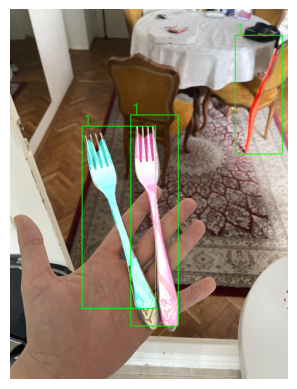

In [38]:
from PIL import Image
import matplotlib.pyplot as plt


folder = '/content/'
visual_folder = '/content/visualisator/'
imgname = 'viljuska.jpg'

image = cv2.imread(folder + imgname)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Move the model from GPU to CPU
model = model.to('cpu')
model.eval()

masks, boxes, pred_cls = get_prediction(
        image, model, threshold=0.75
)

# visualize result
visualize_prediction(
    image, masks, boxes, pred_cls, rect_th=3, text_size=3, text_th=3, file_name = imgname
)

image = cv2.imread(visual_folder + imgname)

# Load the image
image_path = visual_folder + imgname  # Replace with the path to your image file
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

# Saving the model

In [32]:
import zipfile
from google.colab import files
import datetime

# Get the current date and time
current_datetime = datetime.datetime.now()

# Create the string
file_name = "model_" + current_datetime.strftime("%Y-%m-%d_%H-%M-%S.pth")

torch.save(model.state_dict(), file_name)

# Specify the path to the model file
model_file_path = '/content/'+ file_name

# Specify the desired name for the compressed file
compressed_file_name = 'model.zip'

# Create a ZIP archive and add the model file to it
with zipfile.ZipFile(compressed_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file_path)

# Download the compressed file
files.download(compressed_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>